<a href="https://colab.research.google.com/github/Msh20240874/Uber-Journey-Intelligence-Optimizing-Demand-Supply-Dynamics-Reducing-Revenue-Leakage/blob/main/Uber_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# تحميل البيانات
df = pd.read_csv('UBERDATA.csv.csv')

# 1. تنظيف أسماء الأعمدة
# لاحظت في الداتا إن الأسماء ممكن يكون فيها مسافات زيادة أو رموز، هنوحدها
df.columns = df.columns.str.strip()

# 2. دمج التاريخ والوقت
# عندنا عمود Date وعمود Time، الأفضل ندمجهم في عمود واحد Timestamp عشان التحليل الزمني
df['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# 3. نظرة عامة على الداتا
print("--- Info ---")
print(df.info())

print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Booking Status Distribution (أهم عمود) ---")
print(df['Booking Status'].value_counts())

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  object        
 1   Time                               150000 non-null  object        
 2   Booking ID                         150000 non-null  object        
 3   Booking Status                     150000 non-null  object        
 4   Customer ID                        150000 non-null  object        
 5   Vehicle Type                       150000 non-null  object        
 6   Pickup Location                    150000 non-null  object        
 7   Drop Location                      150000 non-null  object        
 8   Avg VTAT                           139500 non-null  float64       
 9   Avg CTAT                           102000 non-null  float64       
 10  Cancell

/tmp/ipython-input-1650997421.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')



--- Driver Cancellation Reasons ---
Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
Name: count, dtype: int64

--- Customer Cancellation Reasons ---
Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64

--- Incomplete Ride Reasons ---
Incomplete Rides Reason
Customer Demand      3040
Vehicle Breakdown    3012
Other Issue          2948
Name: count, dtype: int64


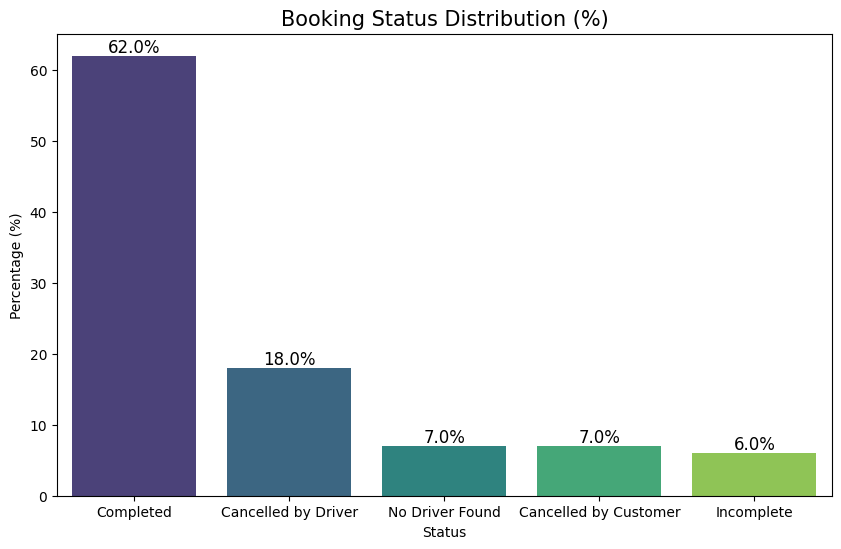

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_csv('UBERDATA.csv.csv')
df.columns = df.columns.str.strip() # Clean column names

# --- 1. Overview Visualization (The Big Picture) ---
plt.figure(figsize=(10, 6))
status_counts = df['Booking Status'].value_counts(normalize=True) * 100
ax = sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')

plt.title('Booking Status Distribution (%)', fontsize=15)
plt.ylabel('Percentage (%)')
plt.xlabel('Status')
# Adding percentage labels
for i, v in enumerate(status_counts.values):
    ax.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=12)
plt.savefig('booking_status_dist.png')

# --- 2. Why are Drivers Cancelling? (Supply Side Issues) ---
# Filter only rows where status is 'Cancelled by Driver'
driver_cancel_df = df[df['Booking Status'] == 'Cancelled by Driver']
driver_reasons = driver_cancel_df['Driver Cancellation Reason'].value_counts()

print("\n--- Driver Cancellation Reasons ---")
print(driver_reasons)

# --- 3. Why are Customers Cancelling? (Demand Side Issues) ---
customer_cancel_df = df[df['Booking Status'] == 'Cancelled by Customer']
customer_reasons = customer_cancel_df['Reason for cancelling by Customer'].value_counts()

print("\n--- Customer Cancellation Reasons ---")
print(customer_reasons)

# --- 4. Incomplete Reasons (Operational Issues) ---
incomplete_df = df[df['Booking Status'] == 'Incomplete']
incomplete_reasons = incomplete_df['Incomplete Rides Reason'].value_counts()

print("\n--- Incomplete Ride Reasons ---")
print(incomplete_reasons)

/tmp/ipython-input-469145702.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_no_driver.index, y=hourly_no_driver.values, palette='Reds_d')
/tmp/ipython-input-469145702.py:43: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='DayOfWeek', columns='Hour', values='Booking ID', aggfunc='count')


تم إنشاء 3 رسوم بيانية توضح أنماط الوقت.


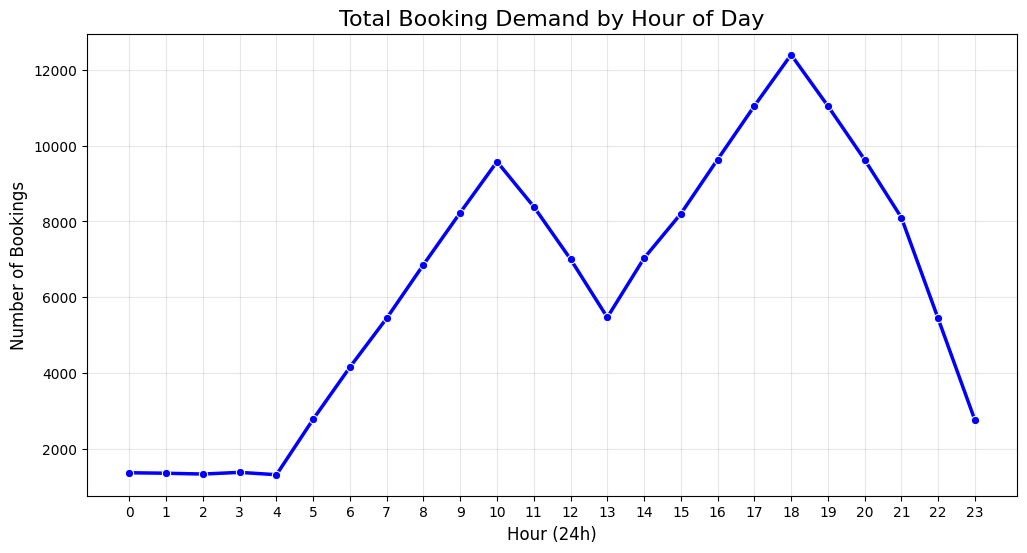

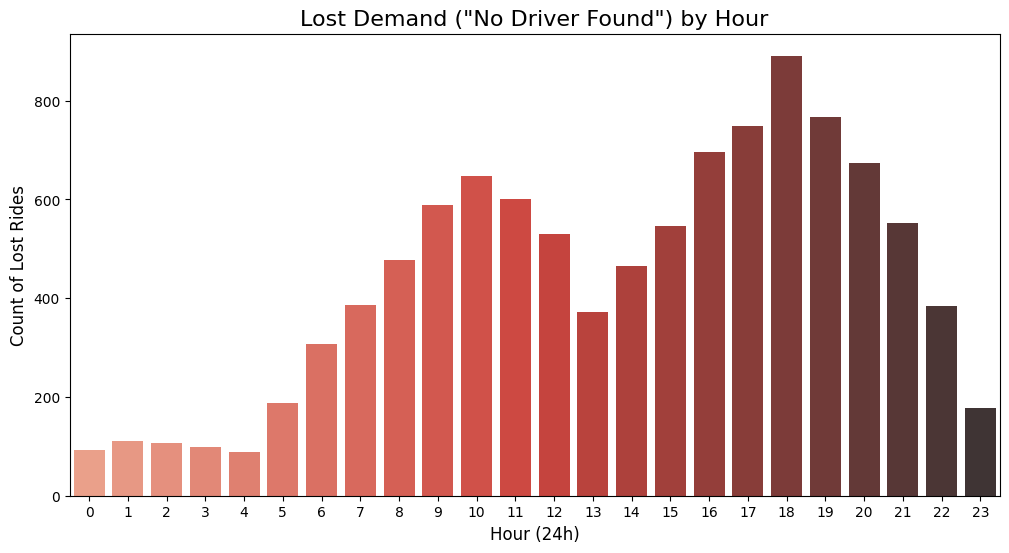

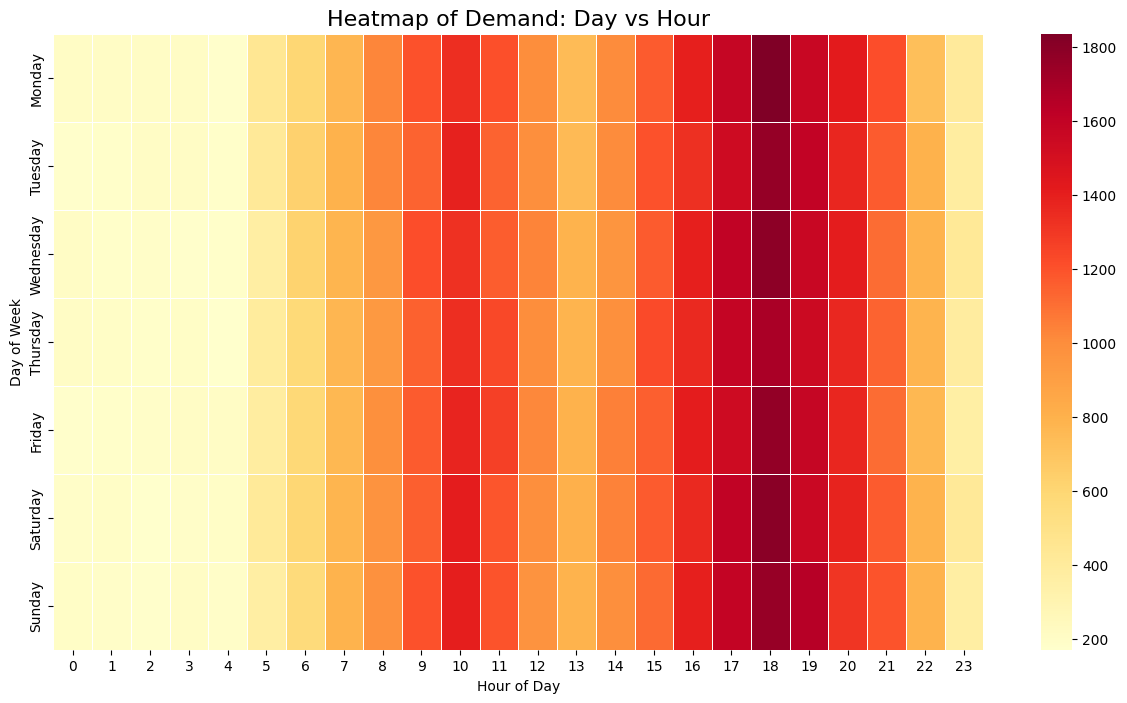

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# إعادة تحميل وتجهيز الداتا (لضمان إن الكود يشتغل معاك قطعة واحدة)
df = pd.read_csv('UBERDATA.csv.csv')
df.columns = df.columns.str.strip()
df['Timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# 1. استخراج خصائص الوقت (Feature Engineering)
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.day_name()

# ترتيب أيام الأسبوع صح عشان الرسم البياني
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=days_order, ordered=True)

# --- Visual 1: Bookings Volume by Hour (تحديد ساعات الذروة) ---
plt.figure(figsize=(12, 6))
hourly_counts = df.groupby('Hour')['Booking ID'].count()
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o', color='b', linewidth=2.5)
plt.title('Total Booking Demand by Hour of Day', fontsize=16)
plt.xlabel('Hour (24h)', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.savefig('demand_by_hour.png')

# --- Visual 2: "No Driver Found" by Hour (تحليل الفرص الضائعة) ---
# عايزين نعرف إيمتى السواقين مش موجودين؟
no_driver_df = df[df['Booking Status'] == 'No Driver Found']
hourly_no_driver = no_driver_df.groupby('Hour')['Booking ID'].count()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_no_driver.index, y=hourly_no_driver.values, palette='Reds_d')
plt.title('Lost Demand ("No Driver Found") by Hour', fontsize=16)
plt.xlabel('Hour (24h)', fontsize=12)
plt.ylabel('Count of Lost Rides', fontsize=12)
plt.savefig('no_driver_by_hour.png')

# --- Visual 3: Peak Heatmap (Day vs Hour) ---
# دي بتوريك "أسخن" أوقات في الأسبوع كله بلمحة واحدة
pivot_table = df.pivot_table(index='DayOfWeek', columns='Hour', values='Booking ID', aggfunc='count')

plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', linewidths=.5)
plt.title('Heatmap of Demand: Day vs Hour', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.savefig('demand_heatmap.png')

print("تم إنشاء 3 رسوم بيانية توضح أنماط الوقت.")

/tmp/ipython-input-2118162813.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_type.index, y=revenue_by_type.values, palette='Greens_r')
/tmp/ipython-input-2118162813.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
/tmp/ipython-input-2118162813.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_km.index, y=avg_price_per_km.values, palette='Oranges_r')


Ranking by Total Revenue:
 Vehicle Type
Auto             11727615.0
Go Mini           9411418.0
Go Sedan          8538560.0
Bike              7144913.0
Premier Sedan     5733655.0
eBike             3298157.0
Uber XL           1406256.0
Name: Booking Value, dtype: float64

Ranking by Price per KM:
 Vehicle Type
Go Sedan         34.659922
Auto             34.000922
Bike             33.892195
Uber XL          33.850249
Premier Sedan    33.730353
Go Mini          33.494784
eBike            32.466188
Name: Price_per_KM, dtype: float64


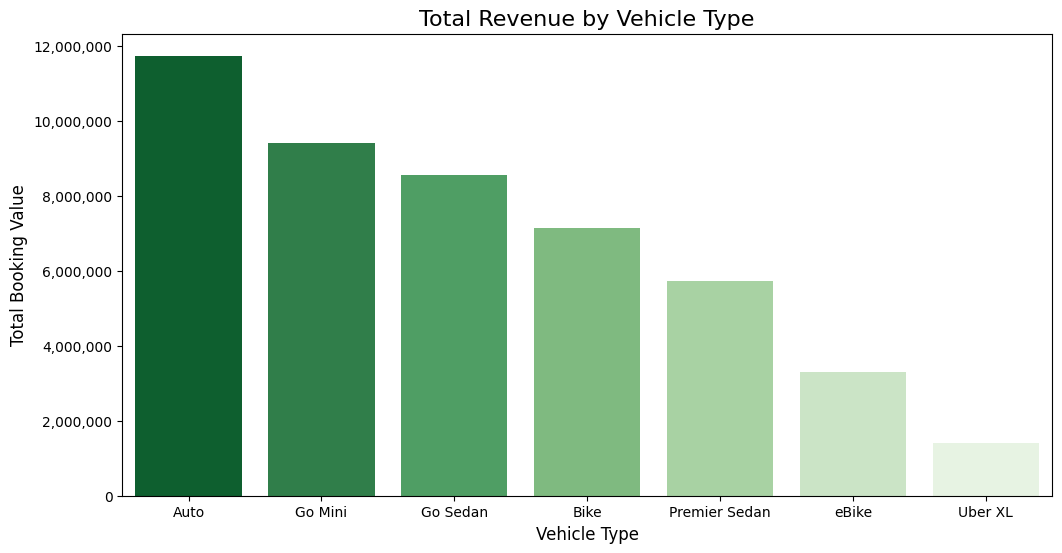

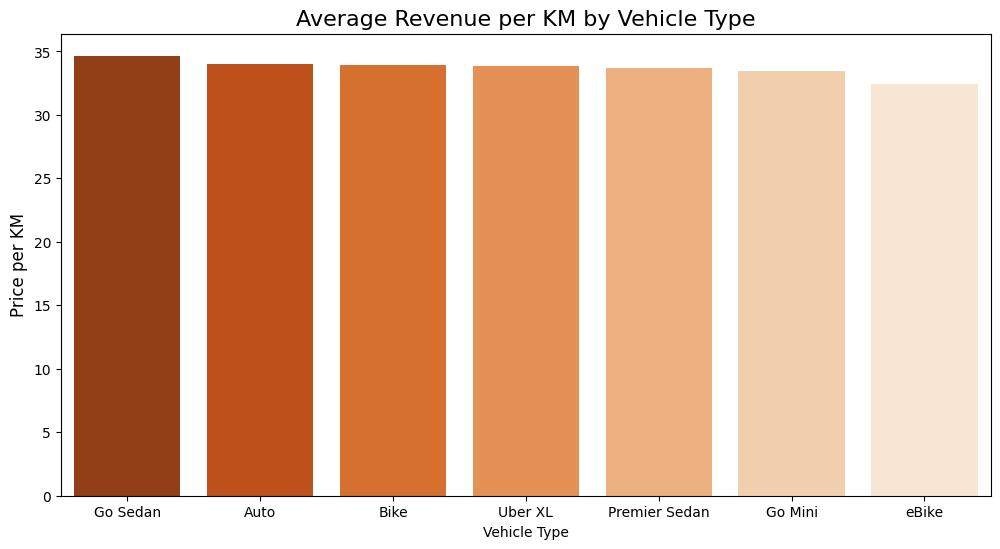

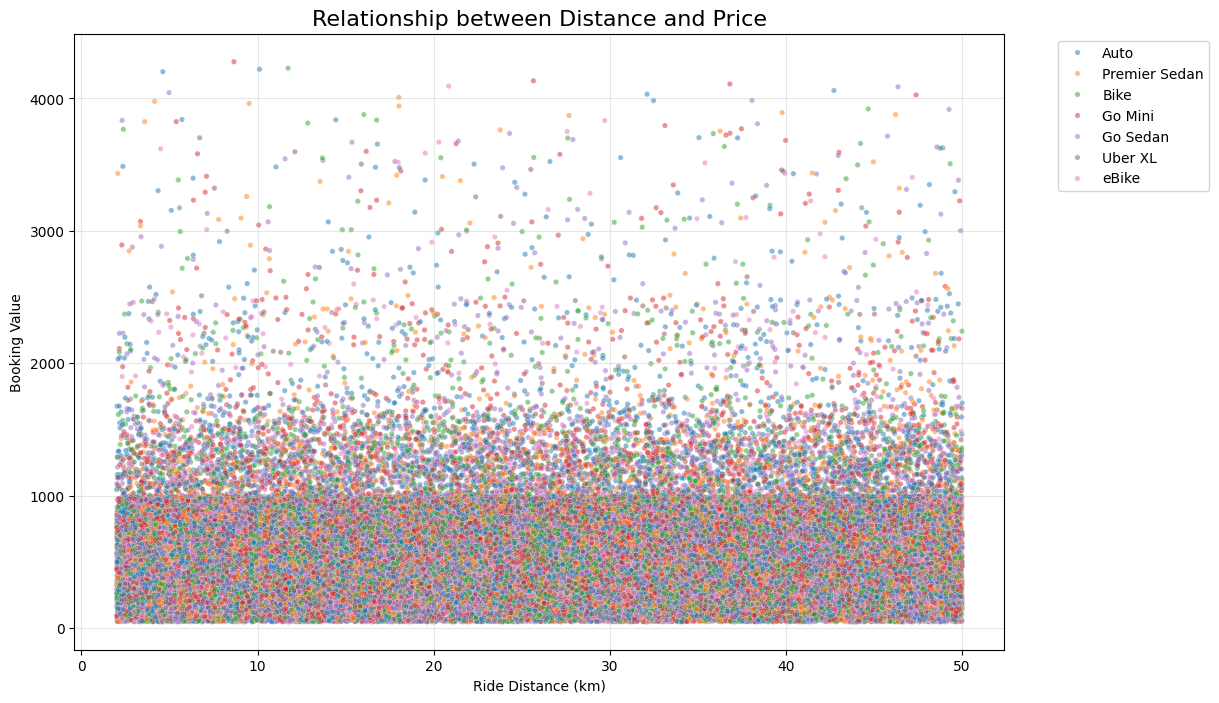

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prep data
df = pd.read_csv('UBERDATA.csv.csv')
df.columns = df.columns.str.strip()

# تركيزنا هنا على الرحلات المكتملة فقط (Completed) لأن دي اللي دفعت فلوس
completed_rides = df[df['Booking Status'] == 'Completed'].copy()

# --- 1. Total Revenue by Vehicle Type (مين الحصان الكسبان؟) ---
revenue_by_type = completed_rides.groupby('Vehicle Type')['Booking Value'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=revenue_by_type.index, y=revenue_by_type.values, palette='Greens_r')
plt.title('Total Revenue by Vehicle Type', fontsize=16)
plt.ylabel('Total Booking Value', fontsize=12)
plt.xlabel('Vehicle Type', fontsize=12)

# Format y-axis to be readable (e.g., in Millions)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.savefig('revenue_by_vehicle.png')

# --- 2. Revenue Efficiency (Revenue per KM) ---
# بنحسب متوسط سعر الكيلومتر لكل نوع عربية
completed_rides['Price_per_KM'] = completed_rides['Booking Value'] / completed_rides['Ride Distance']
avg_price_per_km = completed_rides.groupby('Vehicle Type')['Price_per_KM'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_km.index, y=avg_price_per_km.values, palette='Oranges_r')
plt.title('Average Revenue per KM by Vehicle Type', fontsize=16)
plt.ylabel('Price per KM', fontsize=12)
plt.savefig('revenue_per_km.png')

# --- 3. Price vs Distance Scatter (كشف التسعير) ---
# هل العلاقة خطية؟
plt.figure(figsize=(12, 8))
sns.scatterplot(data=completed_rides, x='Ride Distance', y='Booking Value', hue='Vehicle Type', alpha=0.5, s=15)
plt.title('Relationship between Distance and Price', fontsize=16)
plt.xlabel('Ride Distance (km)')
plt.ylabel('Booking Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Legend outside
plt.grid(True, alpha=0.3)
plt.savefig('price_vs_distance.png')

print("Ranking by Total Revenue:\n", revenue_by_type)
print("\nRanking by Price per KM:\n", avg_price_per_km)